https://www.youtube.com/watch?v=IMKweOTFjXw

In [1]:
import requests

In [2]:
alice_online = 'http://www.umich.edu/~umfandsf/other/ebooks/alice30.txt'
alice_raw_text = requests.get(alice_online).text

### NLTK

## Tokenizing


In [5]:
from nltk import word_tokenize
tokens = word_tokenize(alice_raw_text)[:10]
print(tokens)

['ALICE', "'S", 'ADVENTURES', 'IN', 'WONDERLAND', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM']


## Steammers and lemmatiszer
- am --> be
- cars -->car

In [9]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
stemmed_tk = [porter_stemmer.stem(token) for token in tokens]
print(stemmed_tk)

['alic', "'S", 'adventur', 'IN', 'wonderland', 'lewi', 'carrol', 'the', 'millennium', 'fulcrum']


In [11]:
# analize text better
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

lemm_tk = [wordnet_lem.lemmatize(token) for token in tokens]
print(lemm_tk)

['ALICE', "'S", 'ADVENTURES', 'IN', 'WONDERLAND', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM']


In [21]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')

In [30]:
#! pip install pygal
!pip install cairosvg


    100% |████████████████████████████████| 102kB 1.4MB/s a 0:00:01
    100% |████████████████████████████████| 92kB 2.9MB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 1.9MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d1/24/f53ff6b61b3d728b90934bddb4f03f8ab584a7f49299bf3bde56e2952612/Pillow-5.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Running setup.py bdist_wheel for cairocffi ... done
  Stored in directory: /home/frank/.cache/pip/wheels/3a/2e/92/89e9dcce600a1a78bebe571fdd096669cba354b29c5e1140b9
Successfully built cairocffi
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
thinc 6.10.2 requires pathlib<2.0.0,>=1.0.0, which is not installed.
spacy 2.0.11 requires pathlib, which is not installed.
mkl-random 1.0.1 requires cython, which is not installed.
spacy 2.0.11 has requirement regex==2017.4.5, but you'll have regex 2017.11.9 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should c

In [27]:
import nltk
import pygal

## Exploring and analyzing Data

## Expooring informative tokens: frequency dist

In [23]:
from nltk import FreqDist

freq_dist_alice = FreqDist(alice)
top_25 = freq_dist_alice.most_common(25)

In [28]:
line_chart = pygal.Bar()

for token, count in top_25:
    line_chart.add(token, count)

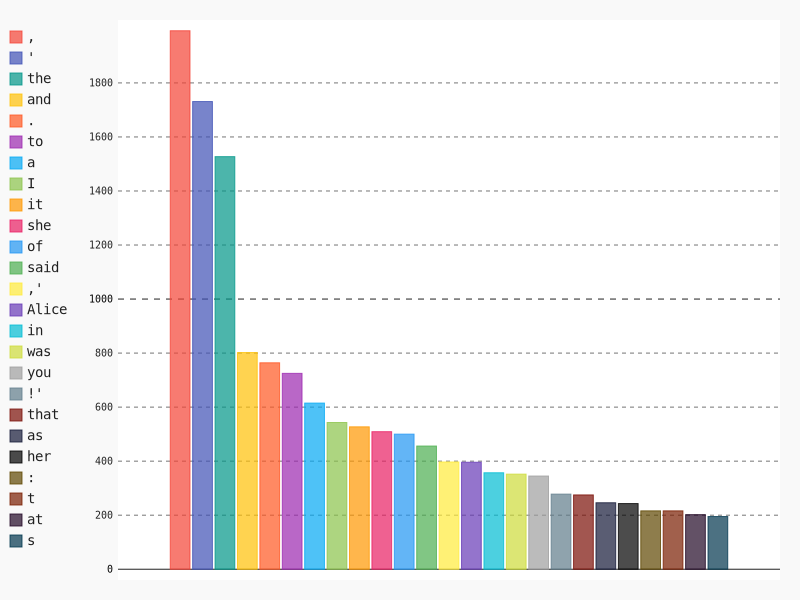

In [31]:
line_chart  # rubbish... he he

In [32]:
freq_dist_alice.hapaxes()[:10]

['Lewis',
 'Carroll',
 '1865',
 ']',
 'Hole',
 'conversations',
 'daisy',
 'chain',
 'daisies',
 'pink']

In [33]:
new_chart = pygal.Bar()

for w in set(alice):
    if len(w) > 6 and freq_dist_alice[w] > 7:
        new_chart.add(w, freq_dist_alice[w])

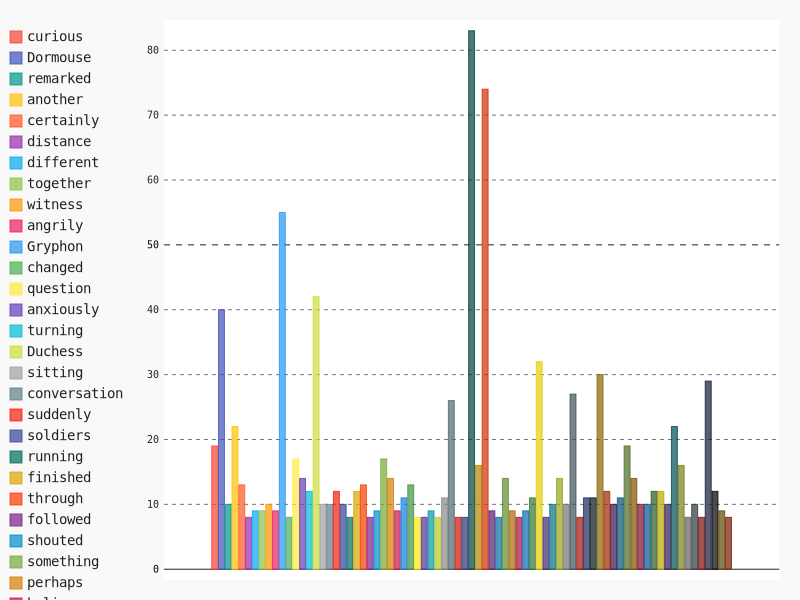

In [34]:
new_chart

# Part of speech tagging

In [38]:
wrd = '''
Begin at the beginning,\" the King said, very gravely, \" and go on till
you come to the end: then stop.
'''
text = word_tokenize(wrd)
nltk.pos_tag(text)

[('Begin', 'VB'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('beginning', 'NN'),
 (',', ','),
 ("''", "''"),
 ('the', 'DT'),
 ('King', 'NNP'),
 ('said', 'VBD'),
 (',', ','),
 ('very', 'RB'),
 ('gravely', 'RB'),
 (',', ','),
 ('``', '``'),
 ('and', 'CC'),
 ('go', 'VB'),
 ('on', 'IN'),
 ('till', 'NN'),
 ('you', 'PRP'),
 ('come', 'VBP'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('end', 'NN'),
 (':', ':'),
 ('then', 'RB'),
 ('stop', 'VB'),
 ('.', '.')]

In [40]:
alice_tagged = nltk.pos_tag(alice)
fd = FreqDist(alice_tagged)
fd_tagged = FreqDist(tag for (word,tag) in alice_tagged )
fd_tagged.most_common(10)

[('NN', 3435),
 ('IN', 2994),
 ('DT', 2901),
 ('PRP', 2714),
 ('NNP', 2480),
 ('VBD', 2465),
 (',', 1993),
 ('RB', 1916),
 ('JJ', 1693),
 ("''", 1294)]

In [41]:
[w[0] for (w,_) in fd.most_common() if w[1] == 'NNP'][:10]

['Alice', ",'", "!'", ".'", "?'", 'Queen', 'King', 'Turtle', 'Mock', 'Gryphon']

# Sentiment Projects

## Rule based sentiments analysis


In [42]:
rev = '''
After the letdown of Avengers: Age of Ultron and the emo antics of Batman v Superman, audiences are increasingly numb to overstuffed superhero ensemble pieces. Captain America: Civil War, though, is proof you can jam pretty much every superhero in your roster into one film and still let individuals shine.

In pitting team Iron Man (Robert Downey Jr.) against Team Cap (Chris Evans) over a suspiciously fascist registration law for "enhanced humans," directors Joe and Anthony Russo could have just put the heroes—familiars like Ant-Man, Black Widow and War Machine, plus newcomers Black Panther and a truly amazing Spider-Man—in a big-ass sandbox and let them duke it out. They do that, and it's spectacular. But there's nothing redundant in the action here, from a Bourne-esque opening chase to close-combat thrills reminiscent of The Raid to a surprisingly subdued and heartfelt finale.

The Russos have heard your complaints about universe-building at the expense of story. Civil War is fun. It's smart. It's coherent. And, most importantly, it allows its heart to beat strongly amid the chaos, with character moments and set pieces working in tandem to create perhaps Marvel's best film so far. Your move, DC
'''

In [43]:
rev

'\nAfter the letdown of Avengers: Age of Ultron and the emo antics of Batman v Superman, audiences are increasingly numb to overstuffed superhero ensemble pieces. Captain America: Civil War, though, is proof you can jam pretty much every superhero in your roster into one film and still let individuals shine.\n\nIn pitting team Iron Man (Robert Downey Jr.) against Team Cap (Chris Evans) over a suspiciously fascist registration law for "enhanced humans," directors Joe and Anthony Russo could have just put the heroes—familiars like Ant-Man, Black Widow and War Machine, plus newcomers Black Panther and a truly amazing Spider-Man—in a big-ass sandbox and let them duke it out. They do that, and it\'s spectacular. But there\'s nothing redundant in the action here, from a Bourne-esque opening chase to close-combat thrills reminiscent of The Raid to a surprisingly subdued and heartfelt finale.\n\nThe Russos have heard your complaints about universe-building at the expense of story. Civil War is

In [44]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()

def tag_review(review):
    # split into tokens
    tokenized_review = tokenizer.tokenize(review)
    # pos tag our tokens
    po_tagged_tokens = nltk.pos_tag(tokenized_review)
    return po_tagged_tokens

tagged_review = tag_review(rev)
print(tagged_review)

[('After', 'IN'), ('the', 'DT'), ('letdown', 'NN'), ('of', 'IN'), ('Avengers', 'NNS'), (':', ':'), ('Age', 'NNP'), ('of', 'IN'), ('Ultron', 'NNP'), ('and', 'CC'), ('the', 'DT'), ('emo', 'JJ'), ('antics', 'NNS'), ('of', 'IN'), ('Batman', 'NNP'), ('v', 'NNP'), ('Superman', 'NNP'), (',', ','), ('audiences', 'NNS'), ('are', 'VBP'), ('increasingly', 'RB'), ('numb', 'JJ'), ('to', 'TO'), ('overstuffed', 'VB'), ('superhero', 'NN'), ('ensemble', 'JJ'), ('pieces.', 'NN'), ('Captain', 'NNP'), ('America', 'NNP'), (':', ':'), ('Civil', 'NNP'), ('War', 'NNP'), (',', ','), ('though', 'IN'), (',', ','), ('is', 'VBZ'), ('proof', 'IN'), ('you', 'PRP'), ('can', 'MD'), ('jam', 'VB'), ('pretty', 'RB'), ('much', 'JJ'), ('every', 'DT'), ('superhero', 'NN'), ('in', 'IN'), ('your', 'PRP$'), ('roster', 'NN'), ('into', 'IN'), ('one', 'CD'), ('film', 'NN'), ('and', 'CC'), ('still', 'RB'), ('let', 'VB'), ('individuals', 'NNS'), ('shine.', 'VB'), ('In', 'IN'), ('pitting', 'VBG'), ('team', 'NN'), ('Iron', 'NNP'), ('

In [45]:
pos = ['nice', 'brilliant','good','great','excellent','entertain','funny','cool','best','fun']

neg = ['bad','gross','disappointed','poor','terrible','crass','boring','unispiring','disappoint']

In [47]:
ls

data/
Introduction to Natural Language Processing with Python - Asyncjs.ipynb*
output/
scattertext.ipynb*
spacy intro.ipynb*
sts_gold_tweet.csv*
topic_modeling.ipynb*
Using Python for Linguistic Data Analysis.ipynb*


# Naiave Bayes Sentiment Analysis


In [50]:
from nltk.classify import NaiveBayesClassifier
import csv


negative =[]
positive = []

with open('data/sts_gold_tweet.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    for row in reader:
        _, polarity, tweet = row
        if polarity == '4':
            positive.append((tweet, 'positive'))
        elif polarity == '0':
            negative.append((tweet, 'negative'))
            

            

In [51]:
neg_trn = negative[:500]
neg_tes = negative[100:]

pos_trn = positive[:500]
pos_tes = positive[100:]

In [52]:
print(neg_trn[0])
print(pos_trn[0])

('the angel is going to miss the athlete this weekend ', 'negative')
('@ mcdonalds with my litto sis aka cuzin lol cristyyyyy ', 'positive')


In [55]:
tweets = []
for words, sentiment in pos_trn+ neg_trn:
    filtered_words = [w.lower() for w in words.split() if len(w) >= 3]
    tweets.append((filtered_words, sentiment))
    
print(tweets[0])

(['mcdonalds', 'with', 'litto', 'sis', 'aka', 'cuzin', 'lol', 'cristyyyyy'], 'positive')


In [57]:
def get_words(tweets):
    for (words, sentiment) in tweets:
        all_tweets += words
    return all_tweets

word_list = get_words(tweets)

UnboundLocalError: local variable 'all_tweets' referenced before assignment